In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 
from time import time
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

formatData =  pd.read_csv("formatData.csv")
formatData.head(10)

,STATEID,pop,rent_mean,hi_mean,hc_mortgage_mean,hc_mean,debt,hs_degree,mean_age,famliyType
0,2.0,12.013847,30.545606,44.844137,46.603431,47.800610,73.920268,77.514677,28.812918,2
1,2.0,9.674543,56.802675,58.111718,51.925350,40.006210,76.951515,92.255478,32.210255,2
2,2.0,4.990690,19.243478,26.365156,47.176423,26.616939,79.571534,85.944543,29.366674,2
3,2.0,15.585744,30.722129,30.898879,37.800236,38.152149,68.183848,93.907904,26.143374,2
4,2.0,14.261362,30.145074,33.231367,41.600359,37.297724,75.908907,84.197767,20.712566,2
5,2.0,15.354961,21.360270,25.626467,36.936228,27.795050,62.907463,81.755163,27.433796,2
6,2.0,19.519551,23.472919,25.841152,35.324981,41.174742,70.478831,83.821679,20.851750,2
7,2.0,14.326926,17.660212,19.887064,38.670365,30.916515,41.639926,73.371160,20.445816,1
8,2.0,8.358029,20.526926,28.002250,33.522672,35.244283,77.415704,80.600692,37.428846,2
9,2.0,8.858934,23.686390,22.501569,30.662648,44.649020,64.175416,85.345686,37.035529,2


In [8]:
def createTrainingSet():
    X = []
    for i in formatData.index:
        X.append(list(formatData.loc[i])[1:-1])
    y = list(formatData["famliyType"])
    return X, y
X, y = createTrainingSet()

def genR():
    res = []
    while len(res) < len(X)/10:
        tempIndex=random.randint(0,len(X)-1)
        if tempIndex not in res:
            res.append(tempIndex)
    return res

#testSetIndex = genR()

def CreateTestSet(testSetIndex,X,y):
    testX = []
    testy = []
    for i in testSetIndex:
        testX.append(X[i])
        testy.append(y[i])
    testX = np.array(testX)
    testy = np.array(testy)
    return testX, testy

#testX, testy = CreateTestSet(testSetIndex,X,y)

def CreateTraintSet(testSetIndex,X,y):
    trainX = []
    trainy = []
    for index, value in enumerate(X):
        if index not in testSetIndex:
            trainX.append(value)
            trainy.append(y[index])

    trainX = np.array(trainX)
    trainy = np.array(trainy)
    return trainX, trainy


#trainX, trainy = CreateTraintSet(testSetIndex,X,y)

def modelSVM(trainX,trainy):
    clf = svm.SVC()
    clf.fit(trainX,trainy)
    return clf

def modelMLP(trainX,trainy,numHidden):
    myMlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(numHidden,2), random_state=1)
    myMlp.fit(trainX,trainy)
    return myMlp
    

def trySVM(trainX,trainy,testX,testy):
    res = []
    clf = modelSVM(trainX,trainy)
    testRes = clf.predict(testX)
    for i in range(len(testRes)):
        if testRes[i] != testy[i]:
            res.append(i)
    rightRate = 1 - len(res)/len(testy)
    return rightRate

def tryMLP(trainX,trainy,testX,testy, numHid):
    res = [] 
    myMlp = modelMLP(trainX,trainy,numHid)
    testRes = myMlp.predict(testX)
    for i in range(len(testRes)):
        if testRes[i] != testy[i]:
            res.append(i)
    rightRate = 1 - len(res)/len(testy)
    return rightRate

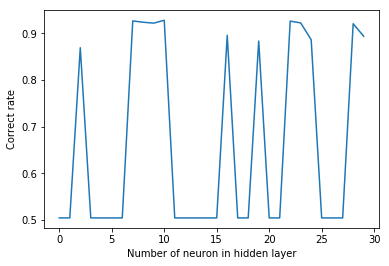

11

In [5]:
def showTheBestMLP():
    testSetIndex = genR()
    X, y = createTrainingSet()
    testX, testy = CreateTestSet(testSetIndex,X,y)
    trainX, trainy = CreateTraintSet(testSetIndex,X,y)
    rateList = []
    suit = 0
    for i in range(30):
        res = tryMLP(trainX,trainy,testX,testy, i+1)
        rateList.append(res)
        if max(rateList) == res:
            suit = i
    plt.plot(list(range(30)), rateList)
    plt.xlabel('Number of neuron in hidden layer')
    plt.ylabel('Accuracy')
    plt.show()
    return suit+1
showTheBestMLP()

In [8]:
def compare():
    SVM = []
    MLP = []
    X, y = createTrainingSet()
    for i in range(10):        
        testSetIndex = genR()
        testX, testy = CreateTestSet(testSetIndex,X,y)
        trainX, trainy = CreateTraintSet(testSetIndex,X,y)
        SVM.append(trySVM(trainX,trainy,testX,testy))
        MLP.append(tryMLP(trainX,trainy,testX,testy,8))
    return SVM, MLP

SVM, MLP = compare()

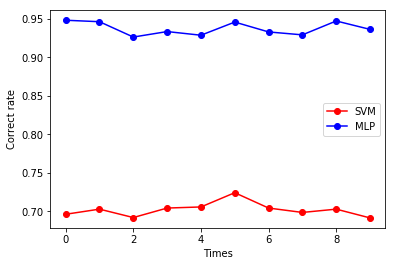

In [9]:
def pltPlot(SVM, MLP):

    plt.plot(list(range(10)), SVM, 'ro-',label = "SVM")
    plt.plot(list(range(10)), MLP, 'bo-',label = "MLP")
    plt.xlabel('Times')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
pltPlot(SVM, MLP)

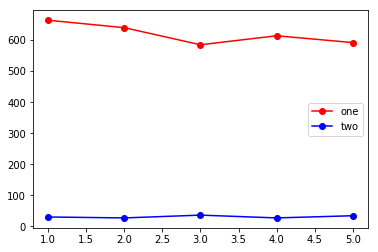

In [10]:
def CompareOneTwo():
    X, y = createTrainingSet()
    oneList = []
    twoList = []
    for i in range(5):
        testSetIndex = genR()
        testX, testy = CreateTestSet(testSetIndex,X,y)
        trainX, trainy = CreateTraintSet(testSetIndex,X,y)
        clf = modelSVM(trainX,trainy)
        pred = clf.predict(testX)
        res = []
        for i in range(len(pred)):
            if pred[i] != testy[i]:
                res.append(testy[i])
        one = 0
        two = 0
        for i in res:
            if i == 1:
                one += 1
            else:
                two += 1

        oneList.append(one)
        twoList.append(two)
    plt.plot([1,2,3,4,5], oneList, 'ro-',label = "one")
    plt.plot([1,2,3,4,5], twoList, 'bo-',label = "two")
    plt.legend()
    plt.show()
CompareOneTwo()

In [13]:
testSetIndex = genR()
testX, testy = CreateTestSet(testSetIndex,X,y)
trainX, trainy = CreateTraintSet(testSetIndex,X,y)

0.5022740364074707


In [95]:
def timeSVM():
    res = []
    for i in range(10):
        start = time()
        model = modelSVM(trainX,trainy)
        stop = time()
        timeConsume = float(stop-start)
        res.append(timeConsume)
    return res

def timeMLP():
    res = []
    for i in range(10):
        start = time()
        model = modelMLP(trainX,trainy,8)
        stop = time()
        timeConsume = float(stop-start)
        res.append(timeConsume)
    return res

def numNandTimeMLP():
    res = []
    for i in range(1,100):
        start = time()
        model = modelMLP(trainX,trainy,i)
        stop = time()
        timeConsume = float(stop-start)
        res.append(timeConsume)
    return res

def printNNTC():
    time = numNandTimeMLP()
    plt.plot(list(range(1,100)), time, 'b-')
    plt.xlabel("The number of neuron in hidden layer")
    plt.ylabel("Second")
    plt.show()

def NumInsTimeModel():
    resSVM = []
    resMLP = []
    numIns = [2500,5000,7500,10000,12500,15000,17500,20000]
    for i in numIns:
        start = time()
        modelSVM(trainX[:i],trainy[:i])
        stop = time()
        resSVM.append(float(stop-start))
        start = time()
        modelMLP(trainX[:i],trainy[:i],8)
        stop = time()
        resMLP.append(float(stop-start))
    return resSVM, resMLP
        

   

        
        
    

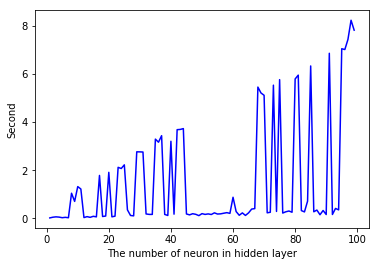

In [39]:
printNNTC()

In [42]:
svmModel, mlpModel = NumInsTimeModel()

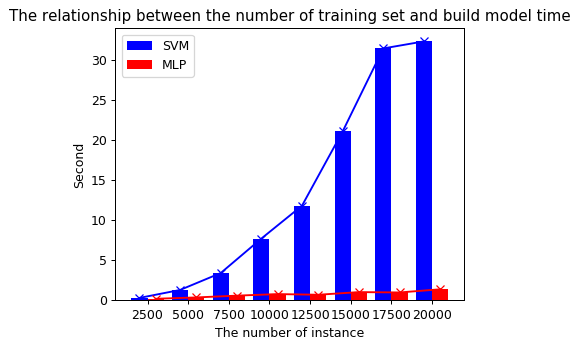

In [70]:
plt.figure(figsize=(5,4),dpi=90)
plt.bar([2000,4500,7000,9500,12000,14500,17000,19500], svmModel, 1000, label = "SVM", fc = "b")
plt.bar([3000,5500,8000,10500,13000,15500,18000,20500], mlpModel, 1000, label = "MLP", fc = "r")
plt.plot([2000,4500,7000,9500,12000,14500,17000,19500],svmModel,'b-x')
plt.plot([3000,5500,8000,10500,13000,15500,18000,20500],mlpModel,'r-x')
plt.xlabel("The number of instance")
plt.ylabel("Second")
plt.title("The relationship between the number of training set and build model time")
plt.legend()
plt.show()

In [103]:
mSVM = modelSVM(trainX, trainy)
mMLP = modelMLP(trainX, trainy,8)
numIns = [250,500,750,1000,1250,1500,1750,2000]
SVM__ = []
MLP__ = []
for i in numIns:
    start = time()
    mSVM.predict(testX[:i])
    stop = time()
    SVM__.append(float(stop - start))
for i in numIns:
    start = time()
    mSVM.predict(testX[:i])
    stop = time()
    MLP__.append(float(stop - start))

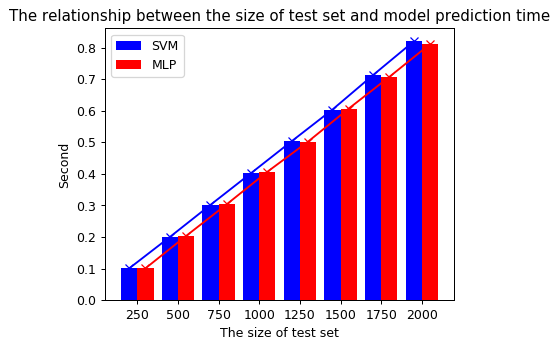

In [106]:
plt.figure(figsize=(5,4),dpi=90)
plt.bar([200,450,700,950,1200,1450,1700,1950], SVM__, 100, label = "SVM", fc = "b")
plt.bar([300,550,800,1050,1300,1550,1800,2050], MLP__, 100, label = "MLP", fc = "r")
plt.plot([200,450,700,950,1200,1450,1700,1950],SVM__,'b-x')
plt.plot([300,550,800,1050,1300,1550,1800,2050],MLP__,'r-x')
plt.xlabel("The size of test set")
plt.ylabel("Second")
plt.title("The relationship between the size of test set and model prediction time")
plt.legend()
plt.show()

In [102]:
SVM__ 

[0.1118471622467041,
 0.19872093200683594,
 0.3052670955657959,
 0.3730921745300293,
 0.4815361499786377,
 0.5519571304321289,
 0.6289892196655273,
 0.7348349094390869]

In [104]:
MLP__

[0.1009979248046875,
 0.2035539150238037,
 0.3038620948791504,
 0.40680384635925293,
 0.5021450519561768,
 0.6066679954528809,
 0.7070868015289307,
 0.8108370304107666]